In [1]:
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [2]:
data=pd.read_csv('SMSSpamCollection.csv',sep='\t',names=['label','message'])
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
stemming = PorterStemmer()
message_list=[]
for i in range(len(data)):
    message = re.sub('[^a-zA-z]',' ',data['message'][i])
    message = message.lower().split()
    message = [stemming.stem(word) for word in message if word not in stopwords.words('english')]
    message_list.append(' '.join(message))  

In [5]:
message_list[0:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though']

In [6]:
for i in range(len(message_list)):
    message_list[i]=' '.join([word for word in message_list[i].split() if len(word)>3])

In [7]:
message_list[0:5]

['jurong point crazi avail bugi great world buffet cine amor',
 'joke',
 'free entri wkli comp final text receiv entri question rate appli',
 'earli alreadi',
 'think live around though']

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
X = vect.fit_transform(message_list)
X = X.toarray()

In [9]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
X.shape

(5572, 5281)

(array([4825.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         747.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

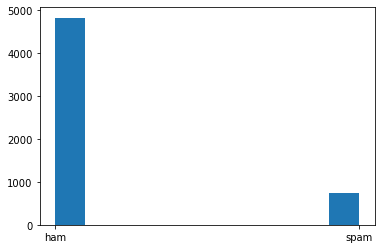

In [11]:
import matplotlib.pyplot as plt
plt.hist(data['label'])

In [12]:
data['label']=pd.get_dummies(data['label'],drop_first=True)
y=data['label'].values

In [13]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

(array([3619.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         560.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

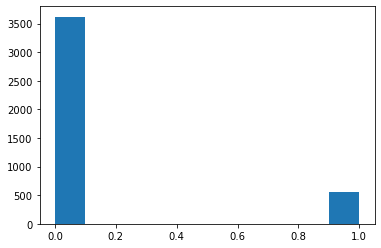

In [14]:
plt.hist(ytrain)

(array([1206.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         187.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

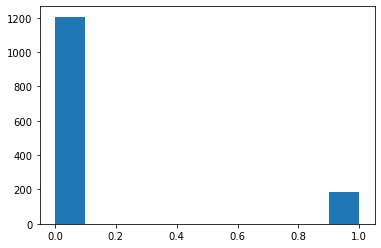

In [15]:
plt.hist(ytest)

In [16]:
pd.Series(ytest).value_counts()

0    1206
1     187
dtype: int64

In [17]:
1206/187

6.449197860962567

In [18]:
pd.Series(ytrain).value_counts()

0    3619
1     560
dtype: int64

In [19]:
3619/560

6.4625

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [21]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(dt,Xtrain,ytrain,cv=5,scoring='f1')

In [22]:
print('mean_score = ',cv.mean())
print('score_var = ',cv.std())

mean_score =  0.8107256344618341
score_var =  0.015562654882946196


In [23]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [24]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(log,Xtrain,ytrain,cv=5,scoring='f1')

In [25]:
print('mean_score = ',cv.mean())
print('score_var = ',cv.std())

mean_score =  0.7322181771940691
score_var =  0.048998887767812985


In [26]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()

In [27]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(log,Xtrain,ytrain,cv=5,scoring='f1')

In [28]:
print('mean_score = ',cv.mean())
print('score_var = ',cv.std())

mean_score =  0.7322181771940691
score_var =  0.048998887767812985


In [29]:
from sklearn.ensemble import RandomForestClassifier 
rand = RandomForestClassifier()

In [30]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(rand,Xtrain,ytrain,cv=5,scoring='f1')

In [31]:
print('mean_score = ',cv.mean())
print('score_var = ',cv.std())

mean_score =  0.8756374297692158
score_var =  0.041072652529790726


In [32]:
rand.fit(Xtrain,ytrain)

RandomForestClassifier()

In [33]:
ypred=rand.predict(Xtest)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(ytest,ypred)

array([[1206,    0],
       [  34,  153]], dtype=int64)

In [35]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1206
           1       1.00      0.82      0.90       187

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.94      1393
weighted avg       0.98      0.98      0.97      1393



In [36]:
for e in ypred:
    print(e,end=' ')

0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 

In [37]:
for e in ytest:
    print(e,end=' ')

0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 